In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import imageio
#!pip install folium
import folium
from folium.plugins import MarkerCluster
from ipywidgets import interactive
import os
import json


In [0]:
%matplotlib inline

In [0]:
crime = pd.read_csv('C:/Users/shuji/Desktop/Python project/crimetodate.csv',encoding = 'latin')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436140 entries, 0 to 436139
Data columns (total 17 columns):
INCIDENT_NUMBER        436140 non-null object
OFFENSE_CODE           436140 non-null int64
OFFENSE_CODE_GROUP     426840 non-null object
OFFENSE_DESCRIPTION    436140 non-null object
DISTRICT               433918 non-null object
REPORTING_AREA         436140 non-null object
SHOOTING               11047 non-null object
OCCURRED_ON_DATE       436140 non-null object
YEAR                   436140 non-null int64
MONTH                  436140 non-null int64
DAY_OF_WEEK            436140 non-null object
HOUR                   436140 non-null int64
UCR_PART               426730 non-null object
STREET                 422763 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location               436140 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 56.6+ MB


In [0]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
3,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"
4,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)"


In [0]:
#changing the datatype to date time and creating a separate column just for the date occured

crime['date_occured']=[i.split(' ')[0] for i in crime.OCCURRED_ON_DATE]
crime['occured_on_dttm'] = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [0]:
#crime.head()
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436140 entries, 0 to 436139
Data columns (total 19 columns):
INCIDENT_NUMBER        436140 non-null object
OFFENSE_CODE           436140 non-null int64
OFFENSE_CODE_GROUP     426840 non-null object
OFFENSE_DESCRIPTION    436140 non-null object
DISTRICT               433918 non-null object
REPORTING_AREA         436140 non-null object
SHOOTING               11047 non-null object
OCCURRED_ON_DATE       436140 non-null object
YEAR                   436140 non-null int64
MONTH                  436140 non-null int64
DAY_OF_WEEK            436140 non-null object
HOUR                   436140 non-null int64
UCR_PART               426730 non-null object
STREET                 422763 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location               436140 non-null object
date_occured           436140 non-null object
occured_on_dttm        436140 non-null datetime64[ns]
dtypes: da

In [0]:
#dropping the original date column
crime = crime.drop(['OCCURRED_ON_DATE', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION','UCR_PART','OCCURRED_ON_DATE'], axis=1)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,date_occured,occured_on_dttm
0,TESTTEST2,NaN,External,,0,2019,10,Wednesday,0,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)",2019-10-16,2019-10-16 00:00:00
1,I90583827,NaN,E18,498,0,2019,11,Saturday,5,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)",2019-11-02,2019-11-02 05:09:00
2,I192082859,Auto Theft,E18,519,NaN,2019,10,Sunday,9,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,2019-10-13 09:28:24
3,I192082751,Auto Theft,E18,493,NaN,2019,10,Saturday,20,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,2019-10-12 20:11:26
4,I192082680,Auto Theft,D14,794,NaN,2019,10,Saturday,15,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,2019-10-12 15:12:43
5,I192082577,Auto Theft,D4,130,NaN,2019,10,Saturday,4,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12,2019-10-12 04:41:52
6,I192079582,Auto Theft,A15,47,NaN,2019,10,Wednesday,8,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)",2019-10-02,2019-10-02 08:08:49
7,I192078648,Investigate Property,B3,427,NaN,2019,9,Sunday,6,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)",2019-09-29,2019-09-29 06:39:00
8,I192078647,Investigate Person,A1,,NaN,2019,9,Sunday,3,NASHUA ST,42.367690,-71.065863,"(42.36769032, -71.06586347)",2019-09-29,2019-09-29 03:45:00
9,I192078645,Verbal Disputes,B3,450,NaN,2019,9,Sunday,6,ASPINWALL RD,42.291816,-71.072441,"(42.29181580, -71.07244098)",2019-09-29,2019-09-29 06:00:00


In [0]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,date_occured,occured_on_dttm
0,TESTTEST2,NaN,External,,0,2019,10,Wednesday,0,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)",2019-10-16,2019-10-16 00:00:00
1,I90583827,NaN,E18,498,0,2019,11,Saturday,5,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)",2019-11-02,2019-11-02 05:09:00
2,I192082859,Auto Theft,E18,519,NaN,2019,10,Sunday,9,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,2019-10-13 09:28:24
3,I192082751,Auto Theft,E18,493,NaN,2019,10,Saturday,20,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,2019-10-12 20:11:26
4,I192082680,Auto Theft,D14,794,NaN,2019,10,Saturday,15,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,2019-10-12 15:12:43


In [0]:
#replace Values in Shooting variable into 0,1
crime['SHOOTING'] = crime['SHOOTING'].replace(to_replace = np.nan, value =0) 
crime['SHOOTING'] = crime['SHOOTING'].replace(to_replace = 'Y', value=1)

In [0]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,date_occured,occured_on_dttm
0,TESTTEST2,NaN,External,,0,2019,10,Wednesday,0,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)",2019-10-16,2019-10-16 00:00:00
1,I90583827,NaN,E18,498,0,2019,11,Saturday,5,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)",2019-11-02,2019-11-02 05:09:00
2,I192082859,Auto Theft,E18,519,0,2019,10,Sunday,9,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,2019-10-13 09:28:24
3,I192082751,Auto Theft,E18,493,0,2019,10,Saturday,20,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,2019-10-12 20:11:26
4,I192082680,Auto Theft,D14,794,0,2019,10,Saturday,15,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,2019-10-12 15:12:43


min data date : 2015-06-15 00:00:00
max data date : 2019-11-03 22:58:00
Incomplete year data on 2015 & 2019


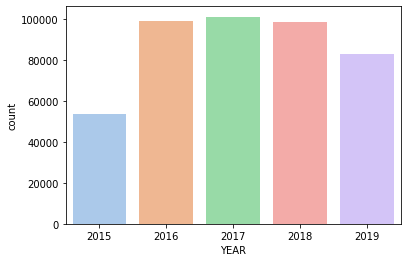

In [0]:
sns.countplot("YEAR", data = crime)
print("min data date :", min(crime.occured_on_dttm))
print("max data date :", max(crime.occured_on_dttm))
print("Incomplete year data on 2015 & 2019")

In [0]:
#plotting Crime Distribution by Day of Week and Comparing the years
def month(x):
    return sns.countplot("MONTH", data = crime[crime.YEAR == x])
interactive(month,x=(2015,2019,1))

interactive(children=(IntSlider(value=2017, description='x', max=2019, min=2015), Output()), _dom_classes=('wi…

In [0]:
#plotting Crime Distribution by Day of Week and Comparing the years
def week(x):
    return sns.countplot("DAY_OF_WEEK",order=crime.DAY_OF_WEEK.value_counts().index, data = crime[crime.YEAR == x])
interactive(week,x=(2015,2019,1))

interactive(children=(IntSlider(value=2017, description='x', max=2019, min=2015), Output()), _dom_classes=('wi…

In [0]:
#plotting Crime Distribution by hour
#result = starts from 7AM & Peaks in the Afternoon (4pm to 7pm) -- 
#this is true across all 4 years
def hour(x):
    return sns.countplot("HOUR", data = crime[crime.YEAR == x])
interactive(hour,x=(2015,2019,1))

interactive(children=(IntSlider(value=2017, description='x', max=2019, min=2015), Output()), _dom_classes=('wi…

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

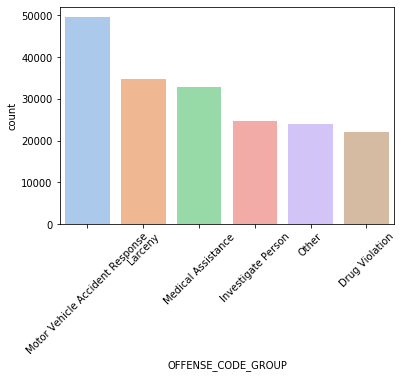

In [0]:
order = crime['OFFENSE_CODE_GROUP'].value_counts().head(6).index
sns.countplot(data = crime, x='OFFENSE_CODE_GROUP', order = order)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

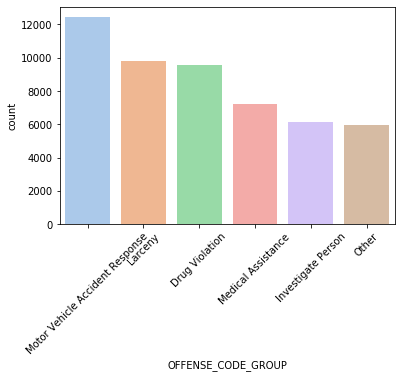

In [0]:
hr = crime[(crime.HOUR >= 16) & (crime.HOUR <=19) | (crime.HOUR >= 23) &(crime.HOUR <=0)]
order = hr['OFFENSE_CODE_GROUP'].value_counts().head(6).index
sns.countplot(data = hr, x='OFFENSE_CODE_GROUP', order = order)
plt.xticks(rotation=45)

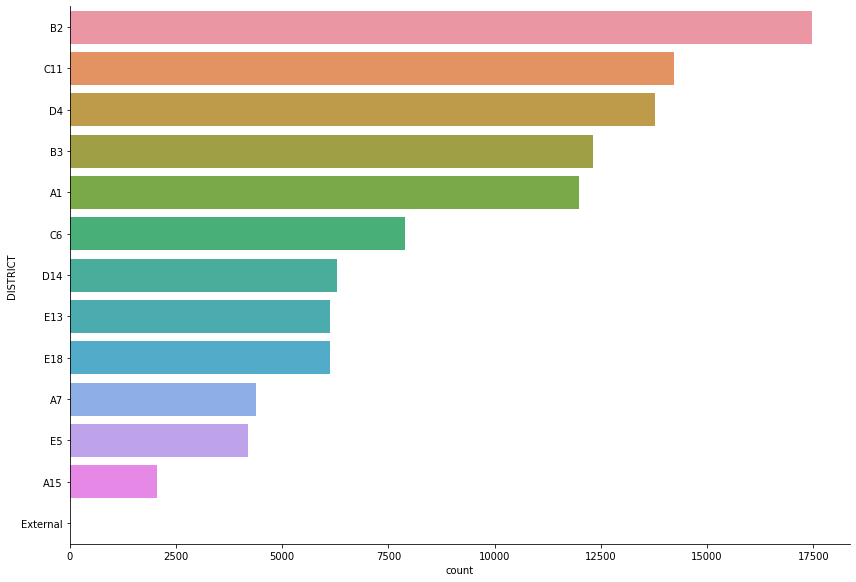

In [0]:
##Offense Group During Peak Time (4pm to 7 pm, 11pm to 12am)
hr = crime[(crime.HOUR >= 16) & (crime.HOUR <=19) | (crime.HOUR >= 23) &(crime.HOUR <=0)]

sns.catplot(y='DISTRICT',
           kind='count',
            height=8, 
            aspect=1.5,
            order=hr.DISTRICT.value_counts().index,
           data=hr)

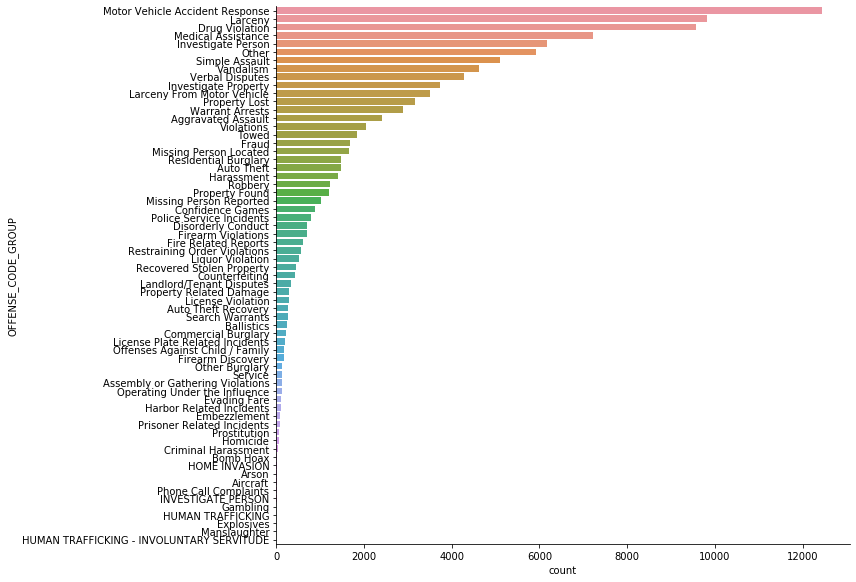

In [0]:
##Offense Group During Peak Time (4pm to 7 pm, 11pm to 12am)
hr = crime[(crime.HOUR >= 16) & (crime.HOUR <=19) | (crime.HOUR >= 23) &(crime.HOUR <=0)]

sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=hr.OFFENSE_CODE_GROUP.value_counts().index,
           data=hr)

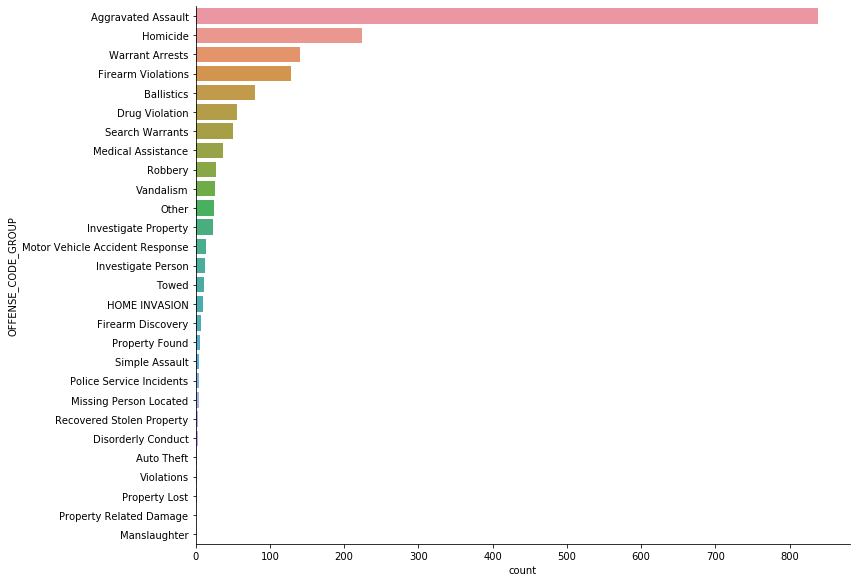

In [0]:
#type of offense code where there is shootings
shtgs = crime[crime.SHOOTING == 1]


sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=shtgs.OFFENSE_CODE_GROUP.value_counts().index,
           data=shtgs)

In [0]:
#Finding areas where there is more than 5 crime incidents
tmp = crime.groupby('INCIDENT_NUMBER')['YEAR'].count().sort_values(ascending = False)
tmp = pd.DataFrame({'INCIDENT_NUMBER': tmp.index, 'NUM_RECORDS': tmp.values})
seriousCrimes = crime.merge(tmp[tmp['NUM_RECORDS'] > 5], on = 'INCIDENT_NUMBER', how = 'inner')
seriousCrimes


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,date_occured,occured_on_dttm,NUM_RECORDS
0,I192077226,Vandalism,D4,171,0,2019,9,Tuesday,21,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)",2019-09-24,2019-09-24 21:02:00,6
1,I192077226,Other,D4,171,0,2019,9,Tuesday,21,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)",2019-09-24,2019-09-24 21:02:00,6
2,I192077226,Other,D4,171,0,2019,9,Tuesday,21,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)",2019-09-24,2019-09-24 21:02:00,6
3,I192077226,Recovered Stolen Property,D4,171,0,2019,9,Tuesday,21,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)",2019-09-24,2019-09-24 21:02:00,6
4,I192077226,Disorderly Conduct,D4,171,0,2019,9,Tuesday,21,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)",2019-09-24,2019-09-24 21:02:00,6
5,I192077226,Simple Assault,D4,171,0,2019,9,Tuesday,21,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)",2019-09-24,2019-09-24 21:02:00,6
6,I192075209,Disorderly Conduct,A1,111,0,2019,9,Wednesday,17,TREMONT ST,42.355942,-71.062583,"(42.35594239, -71.06258333)",2019-09-18,2019-09-18 17:49:00,6
7,I192075209,Robbery,A1,111,0,2019,9,Wednesday,17,TREMONT ST,42.355942,-71.062583,"(42.35594239, -71.06258333)",2019-09-18,2019-09-18 17:49:00,6
8,I192075209,Simple Assault,A1,111,0,2019,9,Wednesday,17,TREMONT ST,42.355942,-71.062583,"(42.35594239, -71.06258333)",2019-09-18,2019-09-18 17:49:00,6
9,I192075209,Firearm Violations,A1,111,0,2019,9,Wednesday,17,TREMONT ST,42.355942,-71.062583,"(42.35594239, -71.06258333)",2019-09-18,2019-09-18 17:49:00,6


In [0]:
seriousCrimes2 = seriousCrimes[['OFFENSE_CODE_GROUP','Lat','Long','NUM_RECORDS','STREET']]
seriousCrimes2.head()

,OFFENSE_CODE_GROUP,Lat,Long,NUM_RECORDS,STREET
0,Vandalism,42.335119,-71.074917,6,HARRISON AVE
1,Other,42.335119,-71.074917,6,HARRISON AVE
2,Other,42.335119,-71.074917,6,HARRISON AVE
3,Recovered Stolen Property,42.335119,-71.074917,6,HARRISON AVE
4,Disorderly Conduct,42.335119,-71.074917,6,HARRISON AVE


In [0]:
seriousCrimes3 = seriousCrimes2.dropna()
seriousCrimes3.head()

,OFFENSE_CODE_GROUP,Lat,Long,NUM_RECORDS,STREET
0,Vandalism,42.335119,-71.074917,6,HARRISON AVE
1,Other,42.335119,-71.074917,6,HARRISON AVE
2,Other,42.335119,-71.074917,6,HARRISON AVE
3,Recovered Stolen Property,42.335119,-71.074917,6,HARRISON AVE
4,Disorderly Conduct,42.335119,-71.074917,6,HARRISON AVE


In [0]:
# Used this tutorial: https://medium.com/@bobhaffner/folium-markerclusters-and-fastmarkerclusters-1e03b01cb7b1
boston = folium.Map(location = [seriousCrimes3['Lat'].mean(), 
                                  seriousCrimes3['Long'].mean()], 
                      zoom_start = 12)
mc = MarkerCluster()
#creating a Marker for each point. 
for row in seriousCrimes3.itertuples():
    mc.add_child(folium.Marker(location = [row.Lat,row.Long],tooltip = 'Offense Code:'+row.OFFENSE_CODE_GROUP+'.\n'+'Street:'+
                               row.STREET))

boston.add_child(mc)

boston

In [0]:
###shooting data
shtng = crime[(crime.SHOOTING == 1) & (crime.DISTRICT.notnull()) & (crime.Lat.notnull()) & (crime.Long.notnull())]

boston1 = folium.Map(location = [shtng['Lat'].mean(), 
                                  shtng['Long'].mean()], 
                      zoom_start = 12)
mc = MarkerCluster()
#creating a Marker for each point. 
for row in shtng.itertuples():
    mc.add_child(folium.Marker(location = [row.Lat,row.Long],tooltip = row.OFFENSE_CODE_GROUP))

boston1.add_child(mc)

boston1

In [0]:
shtng.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,date_occured,occured_on_dttm
875,I192077645,Aggravated Assault,B2,295,1,2019,9,Thursday,2,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)",2019-09-26,2019-09-26 02:38:00
876,I192077645,Ballistics,B2,295,1,2019,9,Thursday,2,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)",2019-09-26,2019-09-26 02:38:00
888,I192077627,Aggravated Assault,C11,344,1,2019,9,Wednesday,23,WESTVILLE TER,42.300980,-71.068699,"(42.30098009, -71.06869928)",2019-09-25,2019-09-25 23:42:00
2784,I192075578,Aggravated Assault,B3,457,1,2019,9,Thursday,17,FOWLER ST,42.300068,-71.083369,"(42.30006755, -71.08336910)",2019-09-19,2019-09-19 17:16:00
3407,I192074923,Vandalism,B2,326,1,2019,9,Tuesday,22,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)",2019-09-17,2019-09-17 22:35:00


# http://geojson.io/#map=2/20.0/0.0

In [0]:
path = os.path.join('data','path.json')

In [0]:
# Used this tutorial: https://medium.com/@bobhaffner/folium-markerclusters-and-fastmarkerclusters-1e03b01cb7b1
boston = folium.Map(location = [seriousCrimes3['Lat'].mean(), 
                                  seriousCrimes3['Long'].mean()], 
                      zoom_start = 12)
mc = MarkerCluster()
#creating a Marker for each point. 
for row in seriousCrimes3.itertuples():
    mc.add_child(folium.Marker(location = [row.Lat,row.Long],tooltip = 'Offense Code:'+row.OFFENSE_CODE_GROUP+'.\n'+'Street:'+
                               row.STREET))

#boston.add_child(mc)

boston.add_child(folium.GeoJson(path, name = 'optimal'))
boston
